In [46]:
##MNIST dataset

In [2]:
##Data loading

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np



import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...


C:\Users\Deepu Raj\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine')

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
2


In [7]:
##Visulise data

In [8]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [9]:
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [10]:
npimg = np.transpose(npimg, (1, 2, 0)).reshape(28, 28)
print(npimg.shape)

(28, 28)


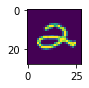

In [11]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [14]:
##Single Convolutional Layer

In [15]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3) #padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [16]:
net = FirstCNN()

In [17]:
out = net(images)
out.shape

torch.Size([4, 16, 26, 26])

In [18]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])


In [19]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(26, 26)


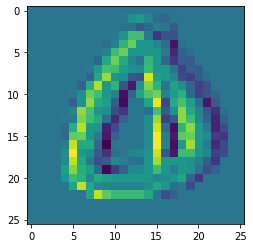

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [21]:
##Deep Convolutional Network

In [22]:
net = FirstCNN_v2()
out = net(images)
out.shape

NameError: name 'FirstCNN_v2' is not defined

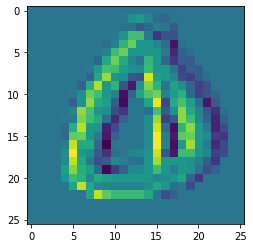

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [24]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, 5),          # (N, 1, 28, 28) -> (N, 6, 26, 26)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 26, 26) -> (N, 6, 13, 13)
            nn.Conv2d(6, 16, 5),         # (N, 6, 13, 13) -> (N, 16, 11, 11)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 11, 11) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [25]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 4, 4])

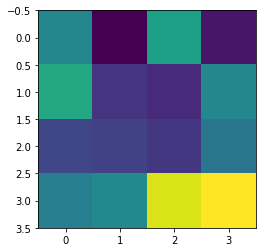

In [26]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [27]:
##LeNet

In [28]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),         # (N, 1, 28, 28) -> (N,  6, 26, 26)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 26, 26) -> (N,  6, 13, 13)
            nn.Conv2d(6, 16, 5),        # (N, 6, 13, 13) -> (N, 16, 11, 11)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 11, 11) -> (N, 16, 4, 4)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [29]:
net = LeNet()
out = net(images)

torch.Size([4, 1, 28, 28])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [30]:
print(net)

LeNet(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [31]:
print(out)

tensor([[ 0.0600, -0.0153, -0.0338, -0.0617,  0.0224, -0.0124, -0.1144,  0.1063,
          0.0342, -0.0293],
        [ 0.0640, -0.0069, -0.0184, -0.0757,  0.0130, -0.0098, -0.0987,  0.1124,
          0.0536, -0.0529],
        [ 0.0528,  0.0021, -0.0207, -0.0694,  0.0203, -0.0159, -0.0756,  0.1314,
          0.0491, -0.0483],
        [ 0.0515, -0.0094, -0.0171, -0.0546,  0.0276, -0.0021, -0.0701,  0.1393,
          0.0397, -0.0476]], grad_fn=<AddmmBackward>)


In [32]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([7, 7, 7, 7])


In [33]:
##Training LeNet

In [34]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [35]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [36]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [37]:
net = LeNet()

In [38]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [40]:
## Move to GPU

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [42]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [43]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [44]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
Wall time: 2min 48s


In [45]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 98.65, Train acc: 99.69
